In [ ]:
import pip
pip.main(["install","matplotlib"])
pip.main(["install","numpy"])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict

In [2]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [3]:
# log_file_list = ["c:\\tmp\\logs\\pop_diff_paths_diff_partitions\\Pop__2_5_1_1_5_12022_6_13_15_24_34_695\\kkt_Pop.txt",
#                  "c:\\tmp\\logs\\pop_diff_paths_diff_partitions\\Pop__3_5_1_1_5_12022_6_13_15_38_33_245\\kkt_Pop.txt"]
log_file_list = ["c:\\tmp\\logs\\pop_diff_paths_diff_partitions\\\Pop__2_5_1_1_5_12022_6_13_15_57_23_162\\kkt_Pop.txt"]
part_to_path_to_gap_mapping = defaultdict(dict)

In [4]:
for log_file in log_file_list:
    with open(log_file, "r") as fp:
        for fline in fp.readlines():
            dur_ms, num_part, num_path, gap = fline.split(",")
            gap = float(gap)
            dur_s = int(dur_ms) / 1000
            num_part = int(num_part)
            num_path = int(num_path)
            part_to_path_to_gap_mapping[num_part][num_path] = gap

In [5]:
part_to_path_to_gap_mapping

defaultdict(dict,
            {2: {1: 95000.00300292327,
              2: 85000.12308230693,
              3: 83750.00187500205,
              4: 82500.00000011903,
              5: 85000.00000003395},
             3: {1: 126666.66666673358,
              2: 111666.66666674259,
              3: 110000.00000002181,
              4: 108333.3333334151,
              5: 108333.46900628743},
             4: {1: 142499.99999987264,
              2: 128750.00500047595,
              3: 121875.17695066202,
              4: 121250.00000322526,
              5: 121250.00000097298},
             5: {1: 152000.00000004275,
              2: 139000.0041207224,
              3: 137000.0028783724,
              4: 134000.2610967907,
              5: 132000.01150015596}})

In [6]:
num_parts_to_x = defaultdict(list)
num_parts_to_y = defaultdict(list)
for (num_part, num_path_to_gap) in part_to_path_to_gap_mapping.items():
    for (num_path, gap) in num_path_to_gap.items():
        num_parts_to_x[num_part].append(num_path)
        num_parts_to_y[num_part].append(gap)
    num_parts_to_x[num_part] = np.array(num_parts_to_x[num_part])
    num_parts_to_y[num_part] = np.array(num_parts_to_y[num_part])

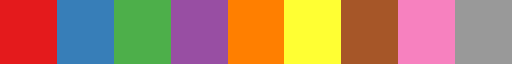

In [7]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [26]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", "--", "--"]
marker_list = ["o", "X", "P", "s"]

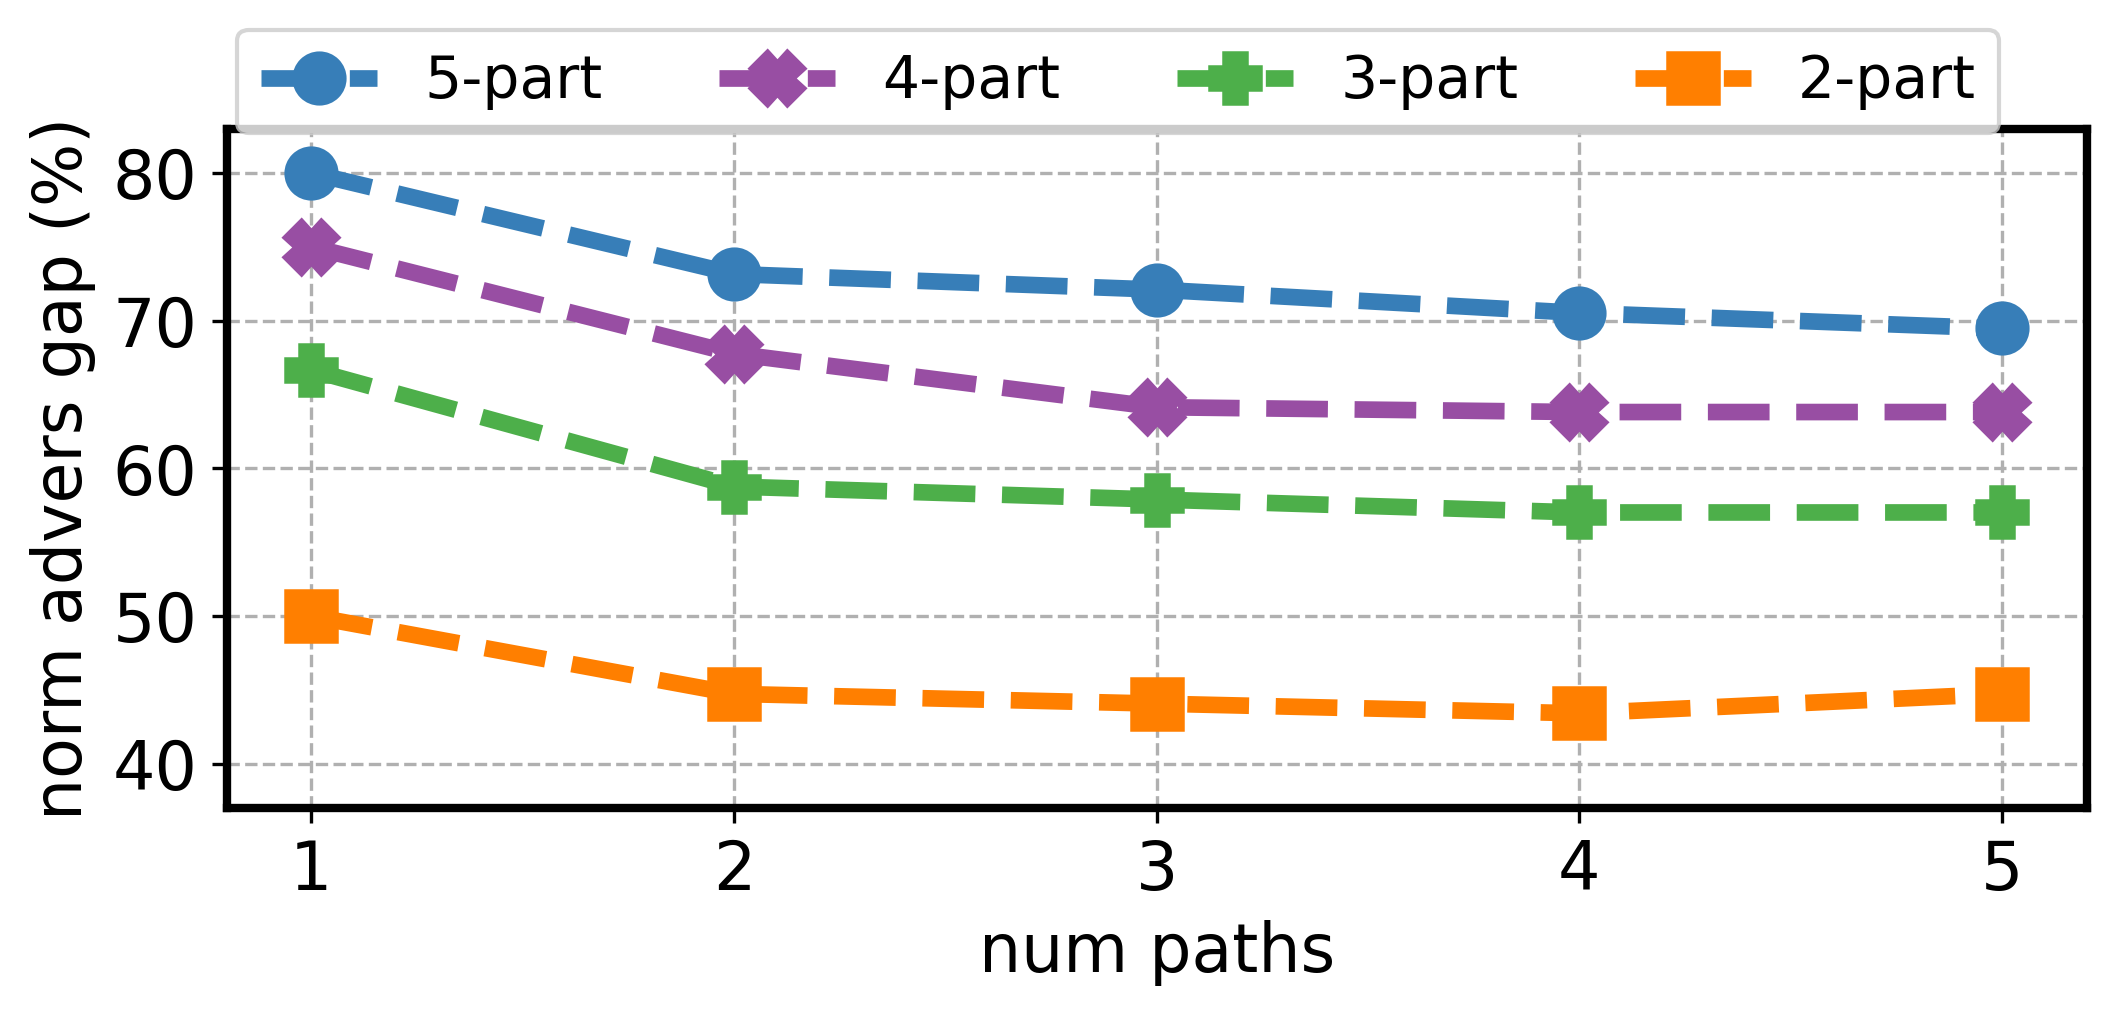

In [46]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
norm_factor = 38 * 5000
num_part_sorted = sorted(num_parts_to_x.keys(), reverse=True)
for idx, num_part in enumerate(num_part_sorted):
    plt.plot(num_parts_to_x[num_part], num_parts_to_y[num_part] * 100/ norm_factor, label=f"{num_part}-part", 
             color=colors[idx], 
             linestyle=line_styles[idx], 
            #  marker="o", 
            #  mfc="white", 
             mec=colors[idx], 
             markersize=10, 
             linewidth=4, 
             markeredgewidth=3,
             marker=marker_list[idx],
    )
# # #add arrow to plot
# # plt.arrow(x=4, y=0.75, dx=0, dy=0.1, width=0.5, head_length=0.03, fc="white") 

# use different fill types
# #add annotation
# min_y = 0.375 * 100
# # plt.annotate('Better', xy = (3.1, min_y - 0.1))
# bbox_props = dict(boxstyle="rarrow", ec="black", fc="white", lw=2)
# t = plt.text(3.1, min_y, "Better", ha="center", va="center", rotation=90,
#             size=16,
#             bbox=bbox_props)
# bb = t.get_bbox_patch()
# bb.set_boxstyle("rarrow", pad=0.6)

plt.legend(fontsize=14, loc="lower left", ncol=4, bbox_to_anchor=(-0.01, 0.95))
# plt.title("Pop on B4 (TimeLimit = 5m)", fontsize=16)
plt.xlabel("num paths", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(np.arange(40, 90, 10), fontsize=16)
plt.xticks(np.arange(1, 6, 1), fontsize=16)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.ylim([37, 83])
plt.savefig(output_fig_dir + "pop_varying_path_partitions.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "pop_varying_path_partitions.pdf", bbox_inches="tight", format="pdf", dpi=300)

In [11]:
num_part_sorted

[2, 3, 4, 5]